In [7]:
import pandas as pd

# 读取数据
data = pd.read_csv("data/dataset.csv")
data

,O,N,SSA,PV,RMIC,Dap,ID/IG,M,Anion,AML,PW,CD,Cs
0,7.15,3.52,1546.1,0.5753,93.985747,1.488390,1.029,2,1,1.0,1.6,0.10,85.0
1,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.10,90.2
2,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.25,86.3
3,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.50,79.9
4,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,1.00,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,1.00,90.1
596,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,2.00,84.7
597,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,5.00,75.5
598,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,8.00,69.4


# 数据分布提琴图

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 为了避免错误输出，先将'ID/IG'列更名为'ID_IG'
data_violin = data.rename(columns={'ID/IG': 'IDperIG'})

# 设置图像风格
sns.set_theme(style="whitegrid")

# 设置字体
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 24,
    'font.weight': 'bold'
})

# 为每一列绘制和保存提琴图
for col in data_violin.columns:
    # 设置图像尺寸
    plt.figure(figsize=(6, 10))
    
    # 绘制提琴图
    sns.violinplot(data=data_violin[col])
    
    # 设置标题和标签
    plt.title(f"Distribution of {col}", weight='bold', fontsize=24)
    plt.xlabel(col, weight='bold', fontsize=24)
    plt.ylabel("Values", weight='bold', fontsize=24)
    
    # 保存图像
    plt.savefig(f'output/figures/violin/violin_{col}.png', dpi=300, bbox_inches='tight')
    
    # 显示图像（可选）
    # plt.show()
    
    # 关闭当前图像，释放内存
    plt.close()
    

# Pearson相关系数

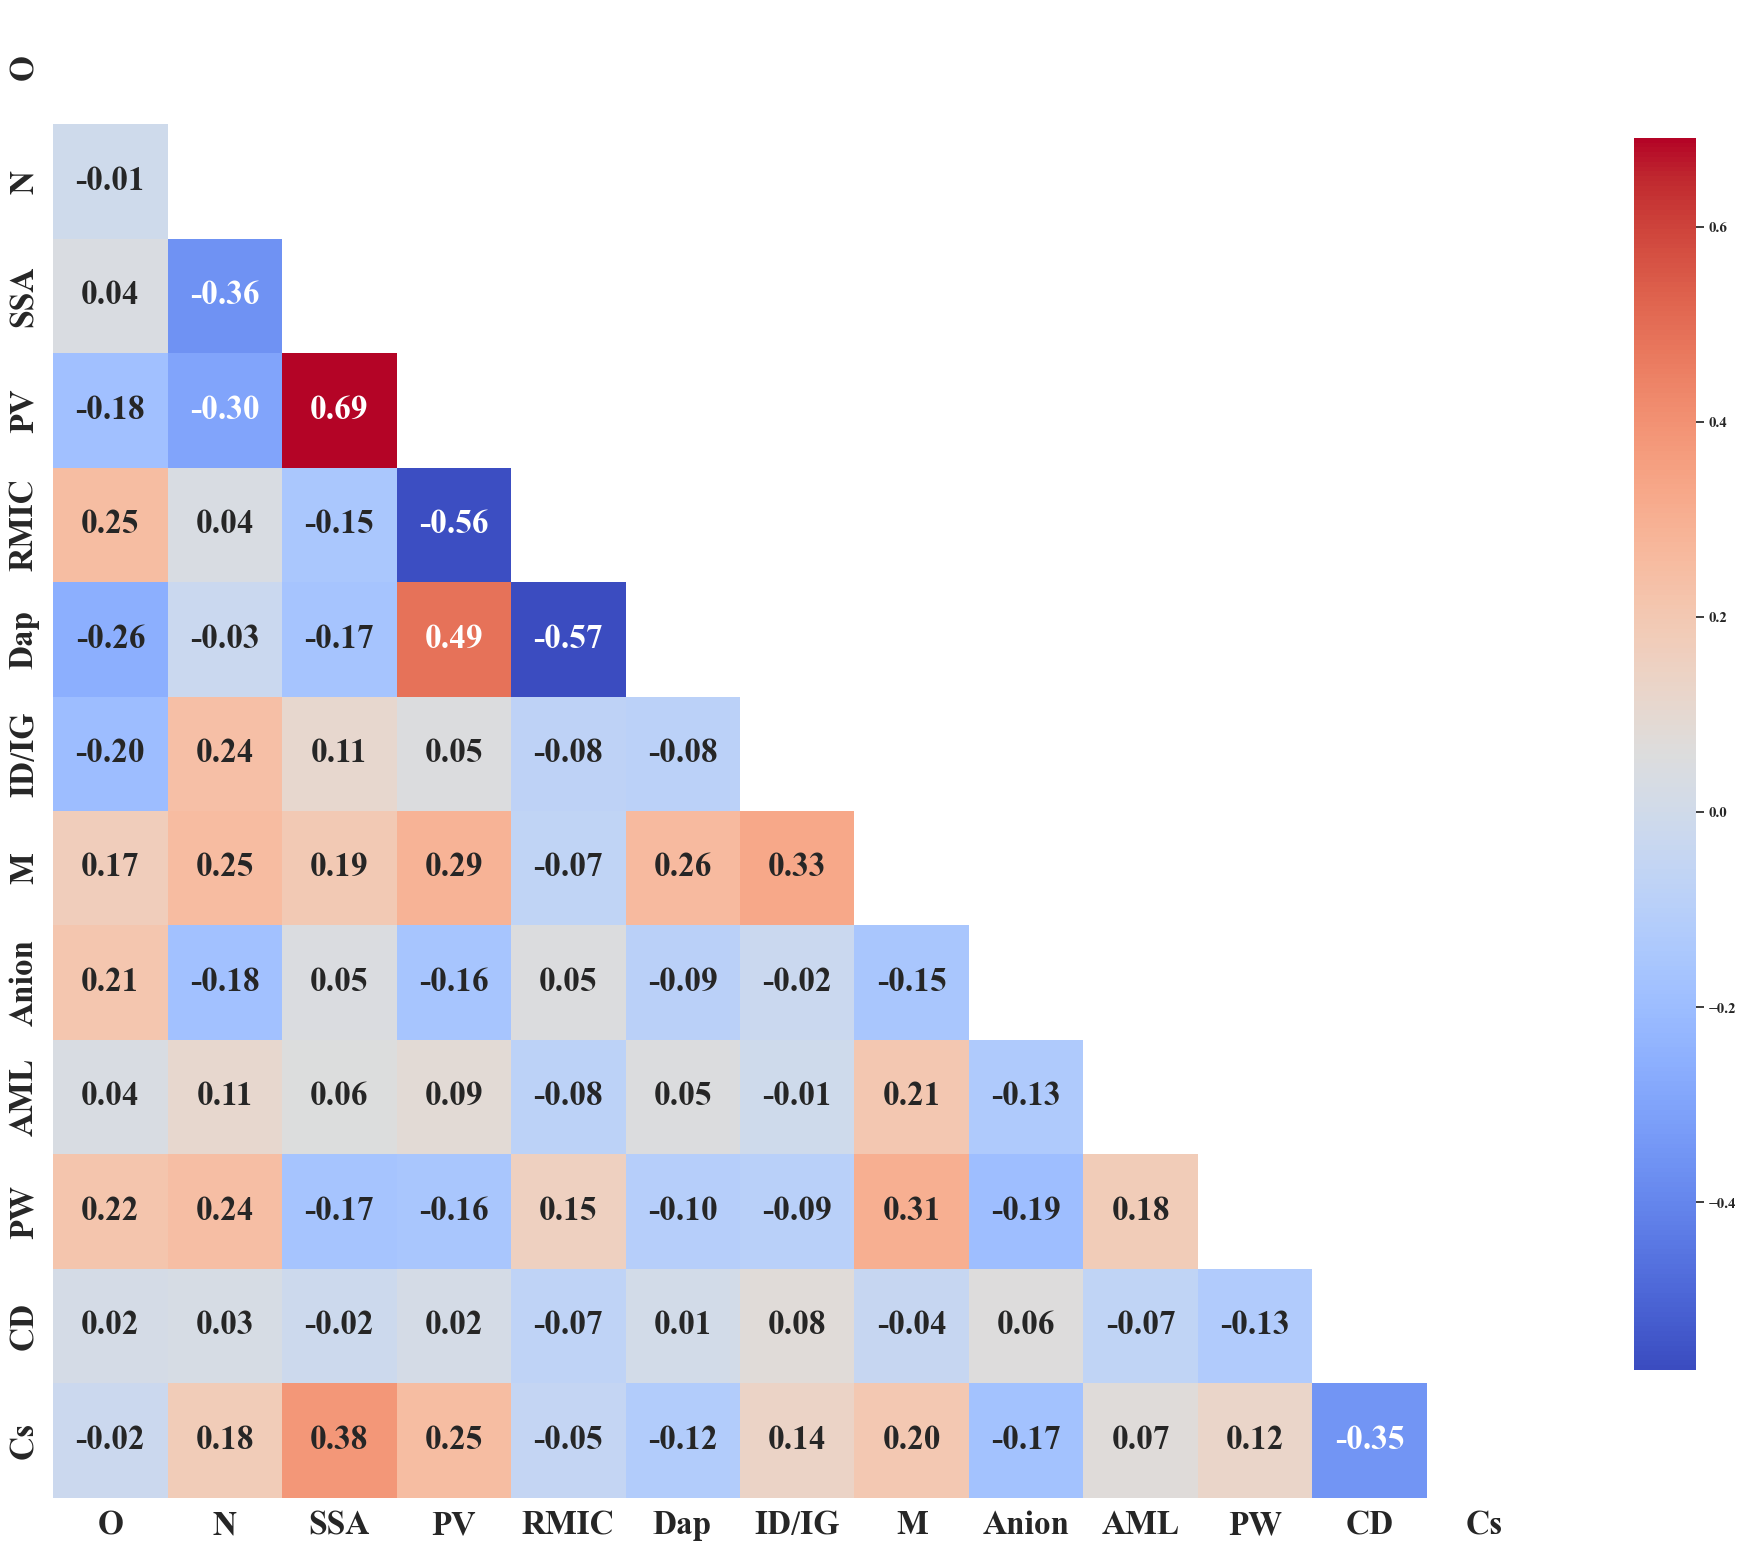

In [9]:
import numpy as np
# 计算相关系数
corr = data.corr()

# 生成下三角矩阵，只保留下三角部分，上三角部分设为 NaN
mask = np.triu(np.ones_like(corr, dtype=bool))
corr[mask] = np.nan

# 手动设置 Seaborn 主题，并控制字体大小
sns.set_theme(style='white', rc={
    'font.family': 'Times New Roman',
    'font.weight': 'bold',
    'font.size': 24
})

# 设置图像尺寸
plt.figure(figsize=(24, 20))

# 生成热力图，不显示背景，手动调整字体大小
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8}, square=True,
    annot_kws={"size": 24},  # 设置数字的字体大小
)

# 手动设置 x 和 y 轴标签的字体大小
plt.xticks(fontsize=24, weight='bold', fontname='Times New Roman')
plt.yticks(fontsize=24, weight='bold', fontname='Times New Roman')

# 保存图像
plt.savefig('output/figures/pearson_corr.png', dpi=600, bbox_inches='tight')

# 显示图像
plt.show()